In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

In [2]:
df_need = pd.read_csv('need.csv')

In [3]:
# ÎπÑÏú® feature ÏÉùÏÑ±
grouped = df_need.groupby(['ÏÑúÎπÑÏä§_ÏóÖÏ¢Ö_ÏΩîÎìú', 'ÏÑúÎπÑÏä§_ÏóÖÏ¢Ö_ÏΩîÎìú_Î™Ö']).sum(numeric_only=True).reset_index()

grouped['weekday_ratio'] = grouped['Ï£ºÏ§ë_Îß§Ï∂ú_Í∏àÏï°'] / grouped['ÎãπÏõî_Îß§Ï∂ú_Í∏àÏï°']
grouped['weekend_ratio'] = grouped['Ï£ºÎßê_Îß§Ï∂ú_Í∏àÏï°'] / grouped['ÎãπÏõî_Îß§Ï∂ú_Í∏àÏï°']
grouped['male_ratio'] = grouped['ÎÇ®ÏÑ±_Îß§Ï∂ú_Í∏àÏï°'] / grouped['ÎãπÏõî_Îß§Ï∂ú_Í∏àÏï°']
grouped['female_ratio'] = grouped['Ïó¨ÏÑ±_Îß§Ï∂ú_Í∏àÏï°'] / grouped['ÎãπÏõî_Îß§Ï∂ú_Í∏àÏï°']
grouped['unknown_ratio'] = grouped['Î≤ïÏù∏Ïπ¥Îìú_Ïô∏Íµ≠Ïù∏_Ïã†ÏõêÎØ∏ÏÉÅ_Í∏àÏï°'] / grouped['ÎãπÏõî_Îß§Ï∂ú_Í∏àÏï°']

for age in ['10', '20', '30', '40', '50', '60_Ïù¥ÏÉÅ']:
    grouped[f'{age}s_ratio'] = grouped[f'Ïó∞Î†πÎåÄ_{age}_Îß§Ï∂ú_Í∏àÏï°'] / grouped['ÎãπÏõî_Îß§Ï∂ú_Í∏àÏï°']

In [4]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏóê ÏÇ¨Ïö©Ìï† feature ÏÑ†ÌÉù
features = grouped[
    ['weekday_ratio', 'weekend_ratio', 'male_ratio', 'female_ratio', 'unknown_ratio',
     '10s_ratio', '20s_ratio', '30s_ratio', '40s_ratio', '50s_ratio', '60_Ïù¥ÏÉÅs_ratio']
]

In [5]:
# ÌëúÏ§ÄÌôî (StandardScaler)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [6]:
# linkage ÌñâÎ†¨ ÏÉùÏÑ± (ward Î∞©Ïãù)
Z = linkage(scaled_features, method='ward')

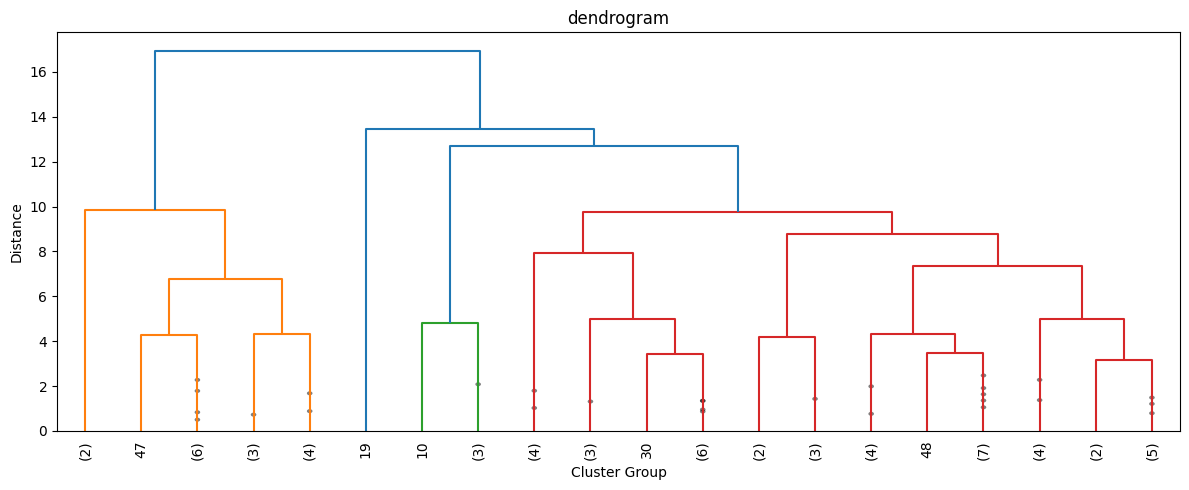

In [7]:
# Îç¥ÎìúÎ°úÍ∑∏Îû® ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title('dendrogram')
plt.xlabel('Cluster Group')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [8]:
from sklearn.metrics import silhouette_score
import numpy as np

In [9]:
cluster_range = range(2, 11)
silhouette_scores = []
Inertia = []

for k in cluster_range:
    labels = fcluster(Z, t=k, criterion='maxclust')
    silhouette_scores.append(silhouette_score(scaled_features, labels))

    centroids = np.array([scaled_features[labels == i].mean(axis=0) for i in np.unique(labels)])
    wss = sum(((scaled_features[labels == i] - centroid) ** 2).sum() for i, centroid in enumerate(centroids, start=1))
    Inertia.append(wss)

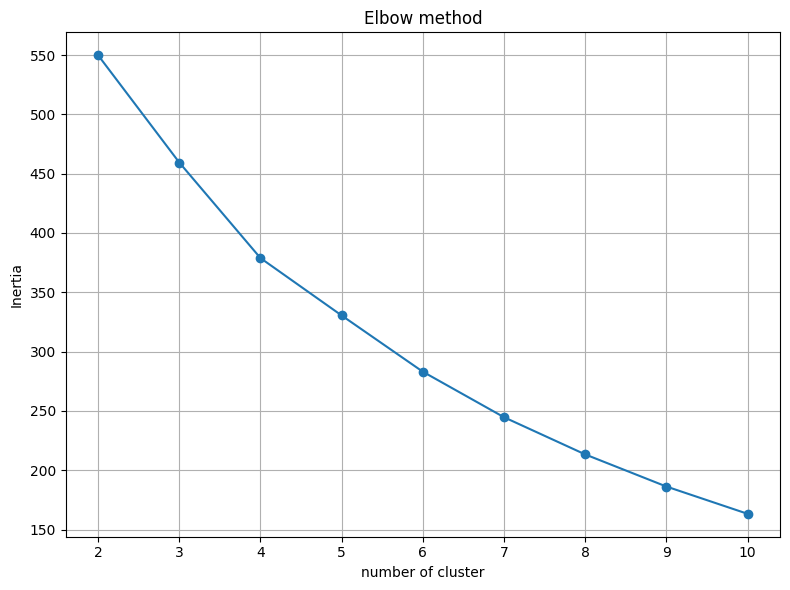

In [10]:
plt.figure(figsize=(8,6))
plt.plot(cluster_range, Inertia, marker='o')
plt.title("Elbow method")
plt.xlabel("number of cluster")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()


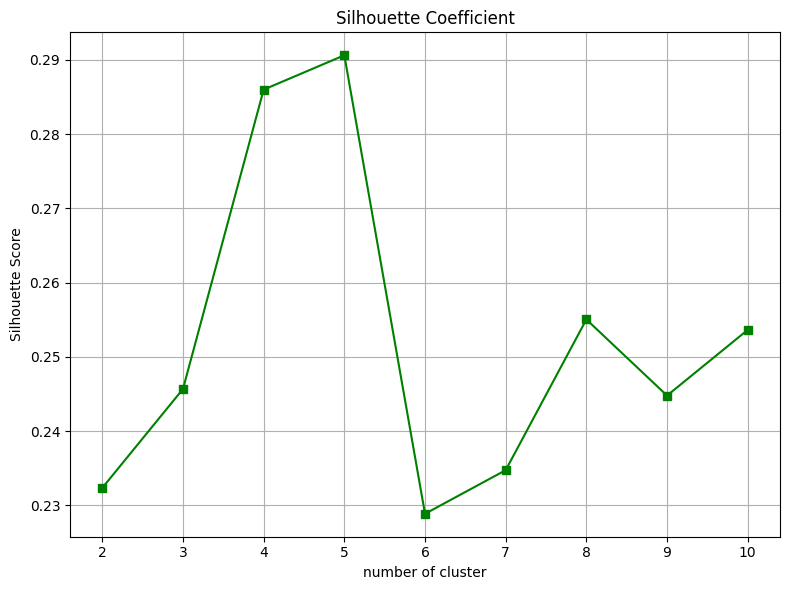

In [11]:
plt.figure(figsize=(8,6))
plt.plot(cluster_range, silhouette_scores, marker='s', color='green')
plt.title("Silhouette Coefficient")
plt.xlabel("number of cluster")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
# Ïã§Î£®Ïó£Í≥ÑÏàòÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ 5Î°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏÑ§Ï†ï
grouped['Í≥ÑÏ∏µ_ÌÅ¥Îü¨Ïä§ÌÑ∞'] = fcluster(Z, t=5, criterion='maxclust')

In [42]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏóÖÏ¢ÖÎ™Ö ÎπàÎèÑÏàò Ï∂úÎ†•
cluster_industry = grouped.groupby('Í≥ÑÏ∏µ_ÌÅ¥Îü¨Ïä§ÌÑ∞')['ÏÑúÎπÑÏä§_ÏóÖÏ¢Ö_ÏΩîÎìú_Î™Ö'].value_counts()

# Î≥¥Í∏∞ ÏâΩÍ≤å Ï∂úÎ†•
for cluster_num, ÏóÖÏ¢Ö in cluster_industry.groupby(level=0):
    print(f"\nüìå ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster_num}Ïóê Ìè¨Ìï®Îêú ÏóÖÏ¢ÖÎì§:")
    print(ÏóÖÏ¢Ö.droplevel(0).sort_values(ascending=False))



üìå ÌÅ¥Îü¨Ïä§ÌÑ∞ 1Ïóê Ìè¨Ìï®Îêú ÏóÖÏ¢ÖÎì§:
ÏÑúÎπÑÏä§_ÏóÖÏ¢Ö_ÏΩîÎìú_Î™Ö
Î¨∏Íµ¨            1
Ïª¥Ìì®ÌÑ∞Î∞èÏ£ºÎ≥ÄÏû•ÏπòÌåêÎß§    1
Name: count, dtype: int64

üìå ÌÅ¥Îü¨Ïä§ÌÑ∞ 2Ïóê Ìè¨Ìï®Îêú ÏóÖÏ¢ÖÎì§:
ÏÑúÎπÑÏä§_ÏóÖÏ¢Ö_ÏΩîÎìú_Î™Ö
Í∞ÄÏ†ÑÏ†úÌíàÏàòÎ¶¨    1
ÎØ∏Í≥°ÌåêÎß§      1
Î∞òÏ∞¨Í∞ÄÍ≤å      1
ÏÑ¨Ïú†Ï†úÌíà      1
Ïú°Î•òÌåêÎß§      1
ÏùòÎ£åÍ∏∞Í∏∞      1
ÏùòÏïΩÌíà       1
Ïù∏ÌÖåÎ¶¨Ïñ¥      1
ÏûêÎèôÏ∞®ÏàòÎ¶¨     1
Ï°∞Î™ÖÏö©Ìíà      1
Ï≤†Î¨ºÏ†ê       1
Ï≤≠Í≥ºÏÉÅ       1
ÏπòÍ≥ºÏùòÏõê      1
ÌïúÏùòÏõê       1
Name: count, dtype: int64

üìå ÌÅ¥Îü¨Ïä§ÌÑ∞ 3Ïóê Ìè¨Ìï®Îêú ÏóÖÏ¢ÖÎì§:
ÏÑúÎπÑÏä§_ÏóÖÏ¢Ö_ÏΩîÎìú_Î™Ö
Ïä§Ìè¨Ï∏† Í∞ïÏäµ    1
ÏòàÏà†ÌïôÏõê      1
Ïô∏Íµ≠Ïñ¥ÌïôÏõê     1
ÏùºÎ∞òÍµêÏäµÌïôÏõê    1
Name: count, dtype: int64

üìå ÌÅ¥Îü¨Ïä§ÌÑ∞ 4Ïóê Ìè¨Ìï®Îêú ÏóÖÏ¢ÖÎì§:
ÏÑúÎπÑÏä§_ÏóÖÏ¢Ö_ÏΩîÎìú_Î™Ö
Í∞ÄÍµ¨              1
Í∞ÄÎ∞©              1
Í∞ÄÏ†ÑÏ†úÌíà            1
Í≥†ÏãúÏõê             1
Í≥®ÌîÑÏó∞ÏäµÏû•           1
ÎÑ§ÏùºÏàç             1
ÎÖ∏ÎûòÎ∞©             1
ÎãπÍµ¨Ïû•             1
ÎØ∏Ïö©Ïã§     

In [24]:
cluster_profile = grouped.groupby('Í≥ÑÏ∏µ_ÌÅ¥Îü¨Ïä§ÌÑ∞')[
    ['weekday_ratio', 'weekend_ratio', 'male_ratio', 'female_ratio', 'unknown_ratio',
     '10s_ratio', '20s_ratio', '30s_ratio', '40s_ratio', '50s_ratio', '60_Ïù¥ÏÉÅs_ratio']
].mean().round(3)


print(cluster_profile)

         weekday_ratio  weekend_ratio  male_ratio  female_ratio  \
Í≥ÑÏ∏µ_ÌÅ¥Îü¨Ïä§ÌÑ∞                                                           
1                0.899          0.101       0.324         0.191   
2                0.841          0.159       0.476         0.408   
3                0.868          0.132       0.405         0.581   
4                0.720          0.280       0.477         0.429   
5                0.645          0.355       0.820         0.180   

         unknown_ratio  10s_ratio  20s_ratio  30s_ratio  40s_ratio  50s_ratio  \
Í≥ÑÏ∏µ_ÌÅ¥Îü¨Ïä§ÌÑ∞                                                                         
1                0.485      0.004      0.052      0.086      0.152      0.140   
2                0.116      0.001      0.037      0.111      0.185      0.243   
3                0.015      0.002      0.056      0.169      0.537      0.184   
4                0.094      0.007      0.147      0.209      0.210      0.198   
5                0.0

In [15]:
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


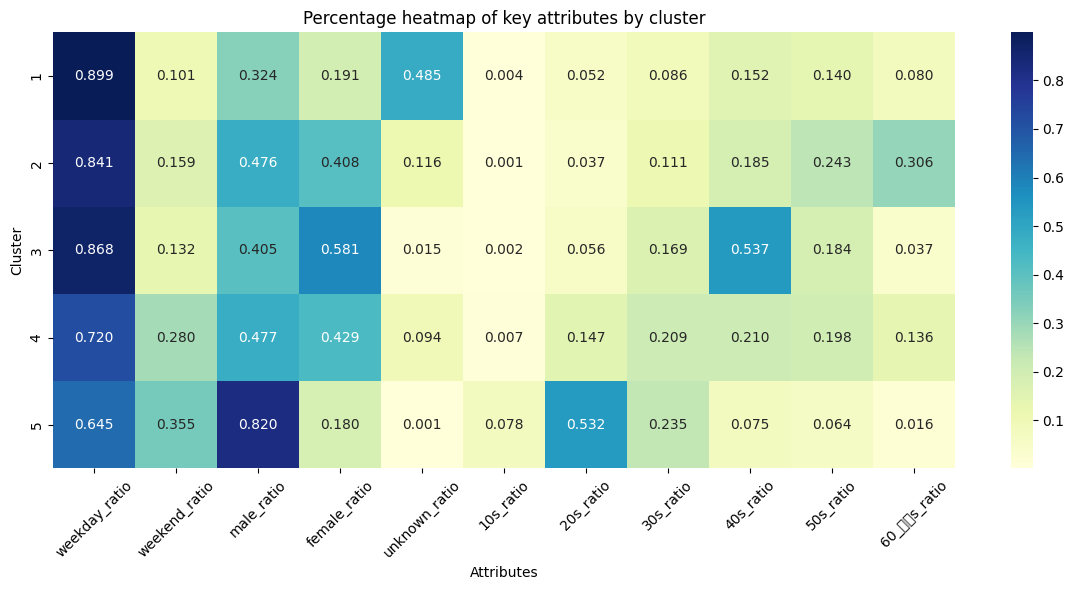

In [25]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    cluster_profile,       # ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    annot=True,            # Ïà´Ïûê ÌëúÏãú
    fmt=".3f",             # ÏÜåÏàòÏ†ê ÎëòÏß∏ ÏûêÎ¶¨ÍπåÏßÄ
    cmap="YlGnBu",         # ÏÉâÏÉÅ ÌÖåÎßà (Ïó∞Îëê~ÌååÎûë Í≥ÑÏó¥)
    cbar=True              # Ïò§Î•∏Ï™Ω ÏÉâÏÉÅÎ∞î ÌëúÏãú
)
plt.title("Percentage heatmap of key attributes by cluster")
plt.ylabel("Cluster")
plt.xlabel("Attributes")
plt.xticks(rotation=45)    # xÏ∂ï ÎùºÎ≤® Í∏∞Ïö∏Ïù¥Í∏∞
plt.tight_layout()         # ÏûêÎèô Ïó¨Î∞± Ï°∞Ï†ï
plt.show()
